# Load Data

In [42]:
import pandas as pd

input_filename = "D:\\nyc taxi\\train.csv"

data = pd.read_csv(input_filename, delimiter=',')


# Data Summary

In [2]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [6]:

print('The maximum trip duration is {}.'.format( data['trip_duration'].max() // 3600))

The maximum trip duration is 979.


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


# Exploratory Data Analysis 

some simple analysis has been done on the given data set to analyze the distribution, insights and characteristics through visualization  

<br>

## Majority of passenger are working adult/ single passenger?

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64


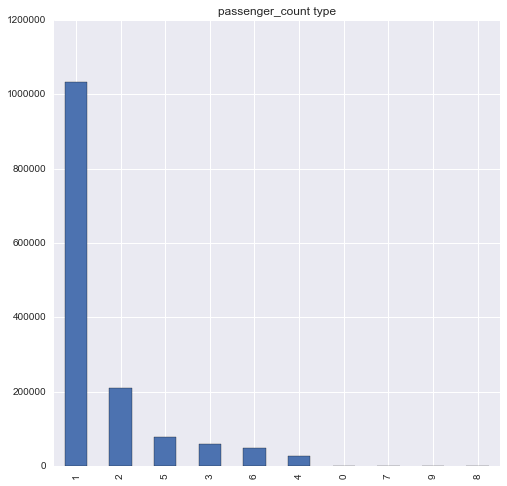

In [6]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline  

print(data.passenger_count.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.passenger_count.value_counts().plot(kind='bar', title="passenger_count type", ax=ax, figsize=(8,8))
plt.show()

<br> 
### The results of passenger_count appear that majority of the rides has only one passenger. However there are also trips that are more than 4 and also trips with zero passenger. 

<br>


2    780302
1    678342
Name: vendor_id, dtype: int64


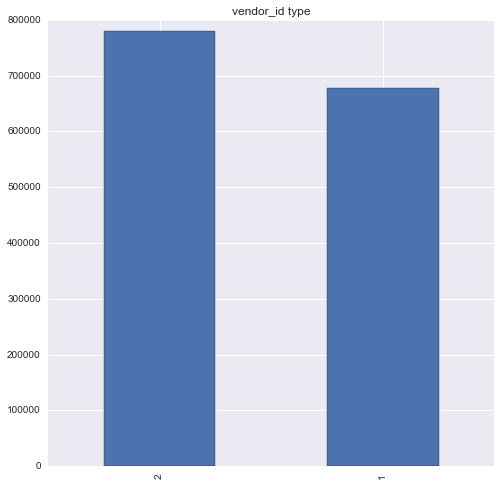

In [7]:
print(data.vendor_id.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.vendor_id.value_counts().plot(kind='bar', title="vendor_id type", ax=ax, figsize=(8,8))
plt.show()

### Second insight shows that vendor_id 2 made more trips than vendor_id 1

In [44]:
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

data['weekday'] = data['pickup_datetime'].dt.weekday_name

In [4]:
data.groupby(['weekday','passenger_count']).count()['vendor_id'].unstack().fillna(0)

passenger_count,0,1,2,3,4,5,6,7,8,9
weekday,,,,,,,,,,
Friday,10.0,158773.0,31930.0,9085.0,4437.0,11881.0,7415.0,NaN,1.0,1.0
Monday,10.0,135346.0,25858.0,7278.0,3362.0,9543.0,6021.0,NaN,NaN,NaN
Saturday,12.0,147889.0,37094.0,10778.0,5490.0,12068.0,7536.0,1.0,NaN,NaN
Sunday,13.0,132245.0,31744.0,9486.0,4620.0,10793.0,6464.0,1.0,NaN,NaN
Thursday,8.0,158543.0,29380.0,8061.0,3619.0,11692.0,7271.0,NaN,NaN,NaN
Tuesday,3.0,147704.0,26601.0,7429.0,3355.0,10899.0,6757.0,1.0,NaN,NaN
Wednesday,4.0,153040.0,27711.0,7779.0,3521.0,11212.0,6869.0,NaN,NaN,NaN


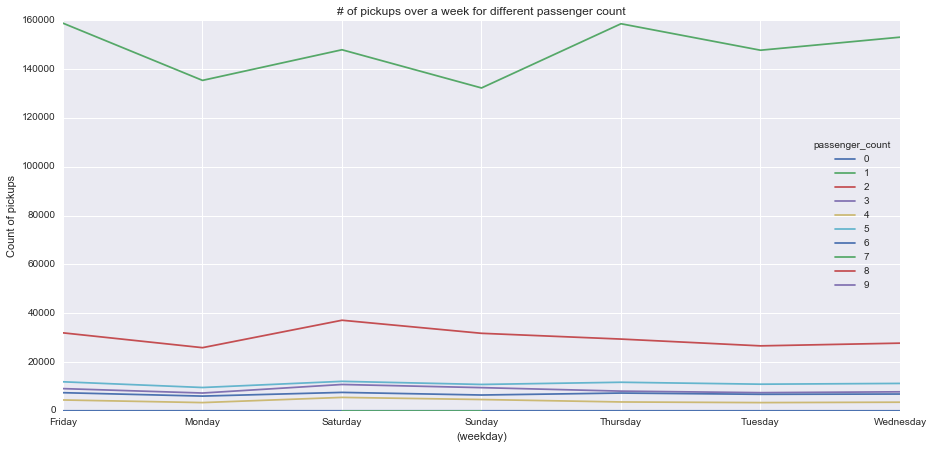

In [3]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline  
fig, ax = plt.subplots(figsize=(15,7))

data.groupby(['weekday','passenger_count']).count()['vendor_id'].fillna(0).unstack().plot(ax=ax)

ax.set_title("# of pickups over a week for different passenger count")
ax.set_xlabel("(weekday)")
ax.set_ylabel("Count of pickups")

sns.set_palette("husl", 8)
plt.show()

## Does weekdays and weekends has the same pickups pattern?

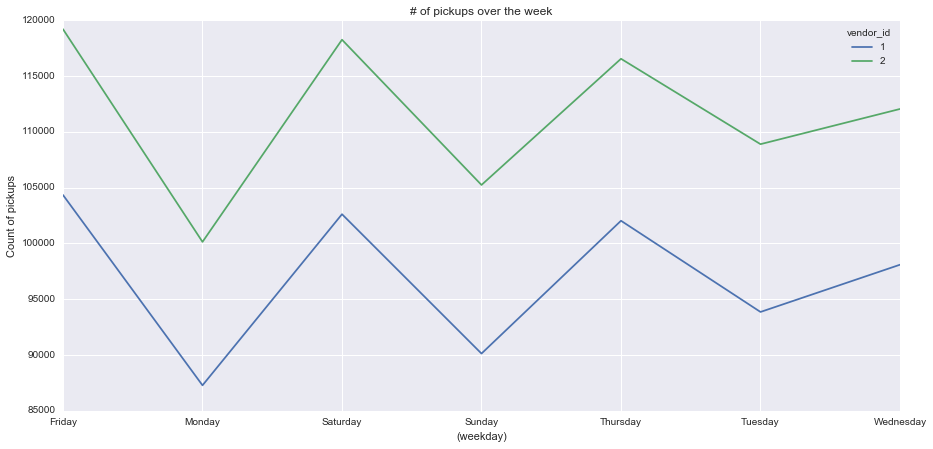

In [45]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,7))

data.groupby(['weekday','vendor_id']).count()['passenger_count'].unstack().plot(ax=ax)



ax.set_title("# of pickups over the week")
ax.set_xlabel("(weekday)")
ax.set_ylabel("Count of pickups")

 
plt.show()

### Monday, Sunday and Tuesday being the non-peak days with least pickup over the week

<br>

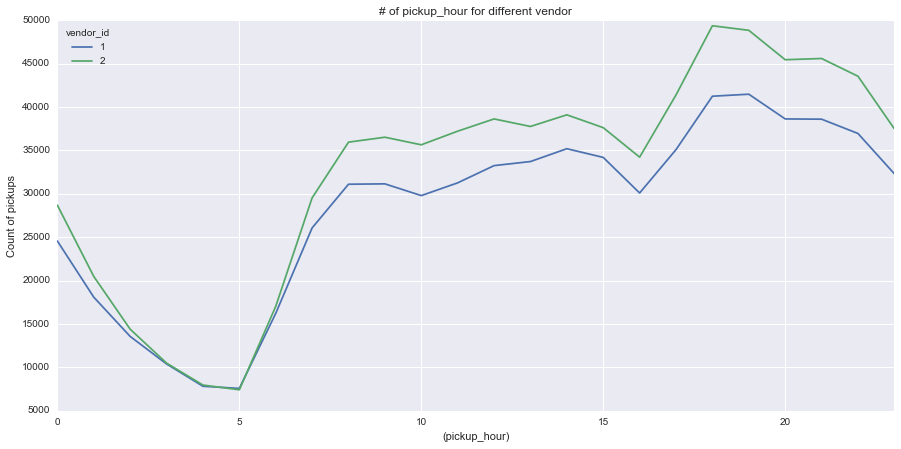

In [46]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline  
data['pickup_hour'] = data.pickup_datetime.apply(lambda x: x.hour)

fig, ax = plt.subplots(figsize=(15,7))

data.groupby(['pickup_hour','vendor_id']).count()['passenger_count'].fillna(0).unstack().plot(ax=ax)



ax.set_title("# of pickup_hour for different vendor")
ax.set_xlabel("(pickup_hour)")
ax.set_ylabel("Count of pickups")

 
plt.show()



### There's an obvious dip from 12am until 5am during the midnight hours and the number of pickups increases again as people wake up for work. 

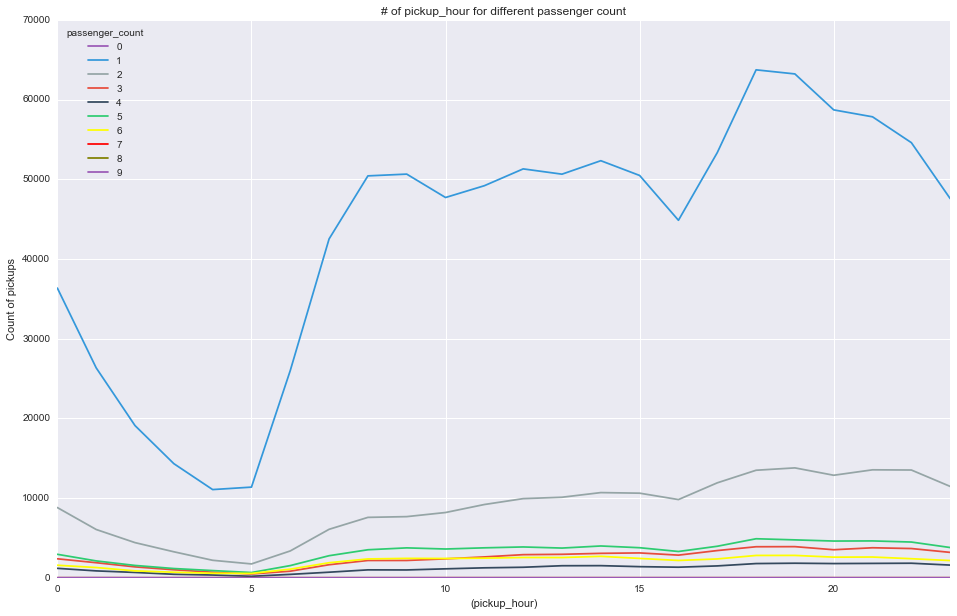

In [74]:
import numpy as np

fig, ax = plt.subplots(figsize=(16,10))

data.groupby(['pickup_hour','passenger_count']).count()['vendor_id'].unstack().fillna(0).plot(ax=ax)



ax.set_title("# of pickup_hour for different passenger count")
ax.set_xlabel("(pickup_hour)")
ax.set_ylabel("Count of pickups")

#flatui =["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#FFFF00"  ,"#FF0000" , "#808000"]
#colour =   sns.color_palette(flatui)
#sns.set_palette(colour)


colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])
    
    
    
plt.show()



#### Findings:

##### Majority of the passengers across the day is only one 


<br>

## Does Weekdays and Weekends has the same prickup pattern across the day?

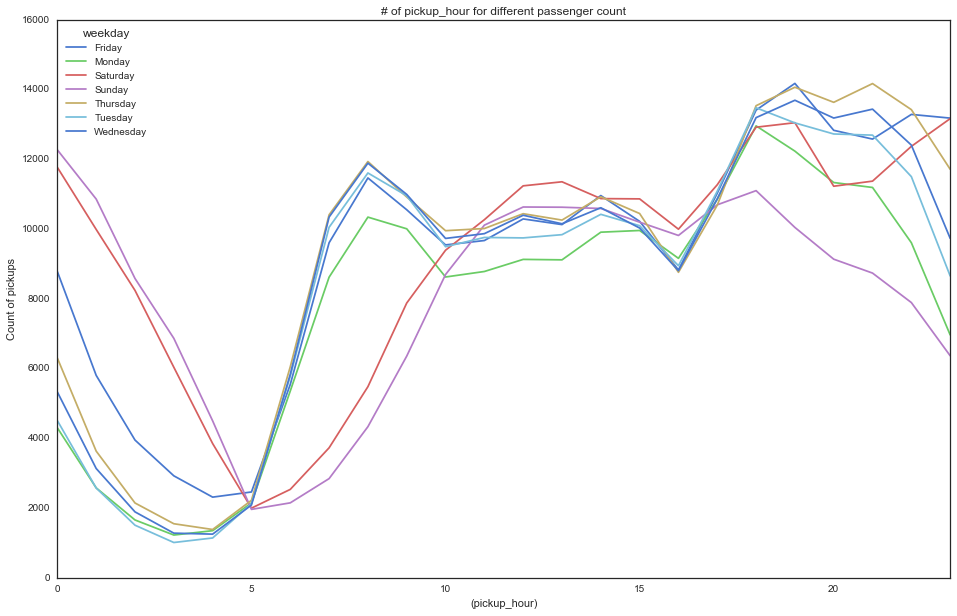

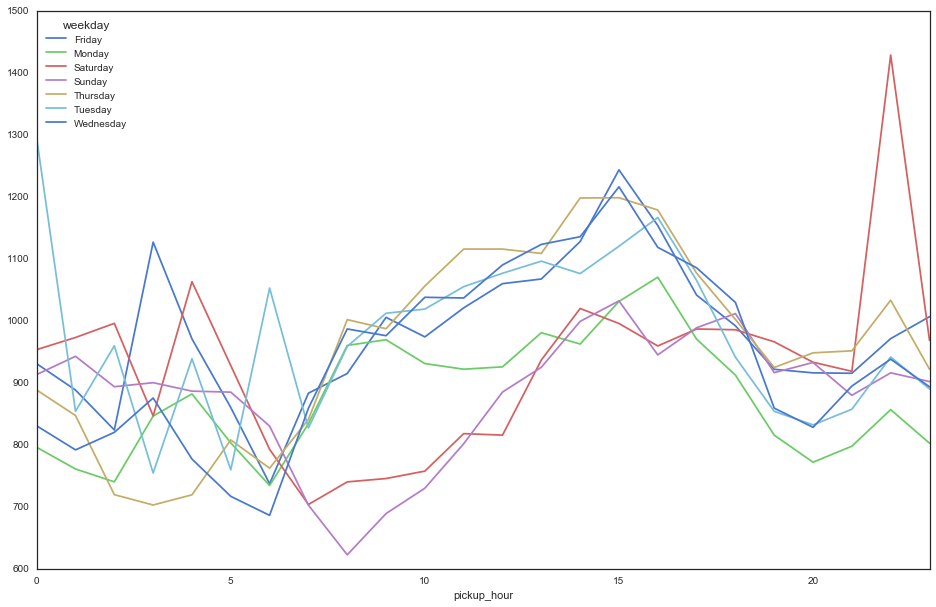

In [19]:
import numpy as np

fig, ax = plt.subplots( figsize=(16,10))
fig, ax1 = plt.subplots( figsize=(16,10))


data.groupby(['pickup_hour','weekday']).count()['vendor_id'].unstack().fillna(0).plot(ax=ax)



ax.set_title("# of pickup_hour for different passenger count")
ax.set_xlabel("(pickup_hour)")
ax.set_ylabel("Count of pickups")

#flatui =["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#FFFF00"  ,"#FF0000" , "#808000"]
#colour =   sns.color_palette(flatui)
#sns.set_palette(colour)

data.groupby(['pickup_hour','weekday']).mean()['trip_duration'].unstack().fillna(0).plot(ax=ax1)




colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])
    
    
    
plt.show()



### Both graphs show that the number of pickups and mean trip duration on Saturday exhibit different characteristics when compare to other days

In [ ]:
data['pickup_month'] = data.pickup_datetime.apply(lambda x: x.month)

data['pickup_month'] = data.pickup_month.apply(lambda x: calendar.month_abbr[x])

Mar    256189
Apr    251645
May    248487
Feb    238300
Jun    234316
Jan    229707
Name: pickup_month, dtype: int64


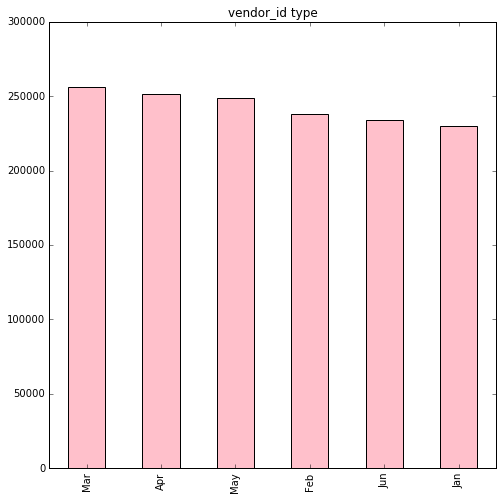

In [13]:
import calendar
import matplotlib.pyplot as plt 

%matplotlib inline 


print(data.pickup_month.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.pickup_month.value_counts().plot(kind='bar', title="vendor_id type", ax=ax, figsize=(8,8), color = 'pink')
plt.show()



In [14]:
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data.loc[:, 'pick_date'] = data['pickup_datetime'].dt.date

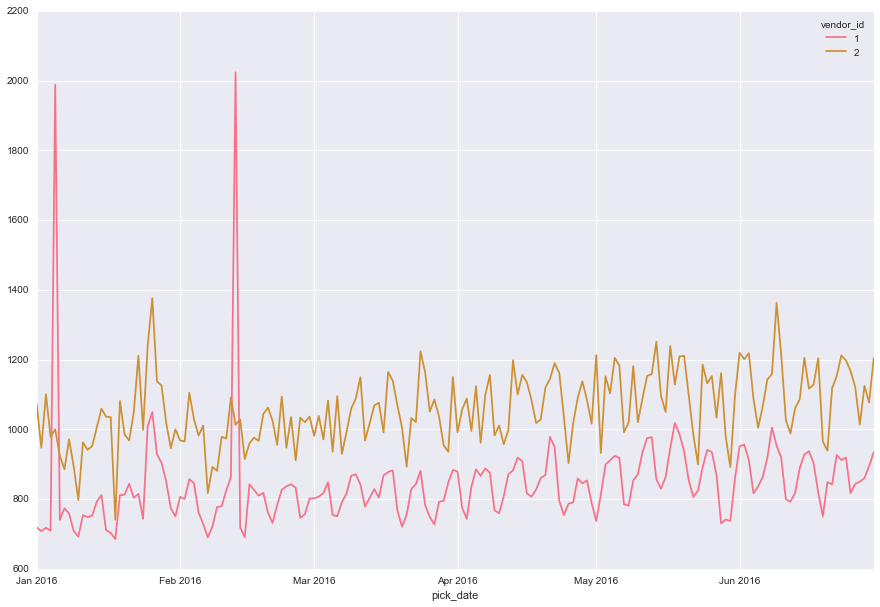

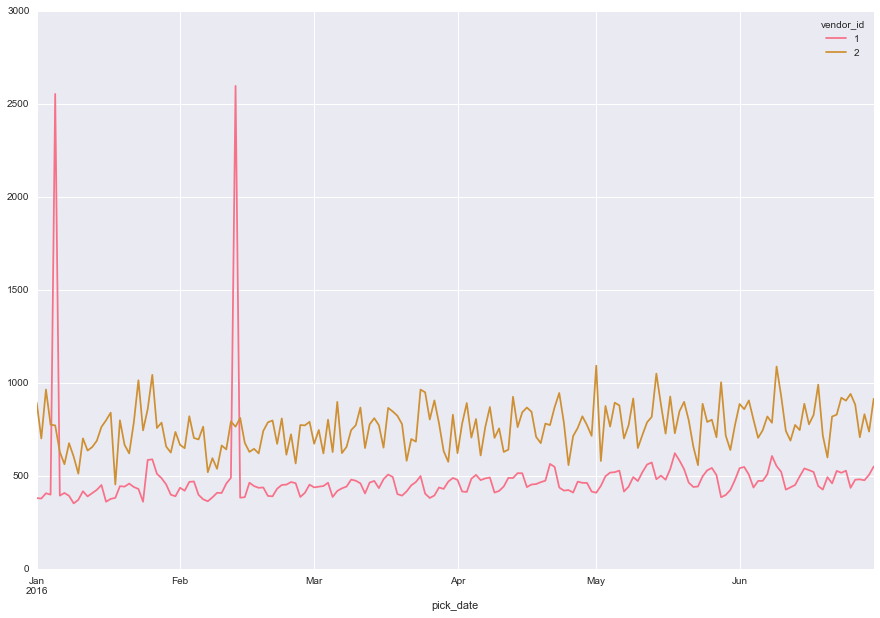

In [5]:
fig, ax = plt.subplots( figsize=(15,10))
fig, ax1 = plt.subplots( figsize=(15,10))

data.groupby(['pick_date','vendor_id']).mean()['trip_duration'].unstack().fillna(0).plot(ax=ax)
data.groupby(['pick_date','vendor_id']).mad()['trip_duration'].unstack().fillna(0).plot(ax=ax1)

plt.show()

In [15]:
data['weekday_num'] = data['pickup_datetime'].dt.weekday

## Does weekdays and weekends has similar trip_duration characteristic?

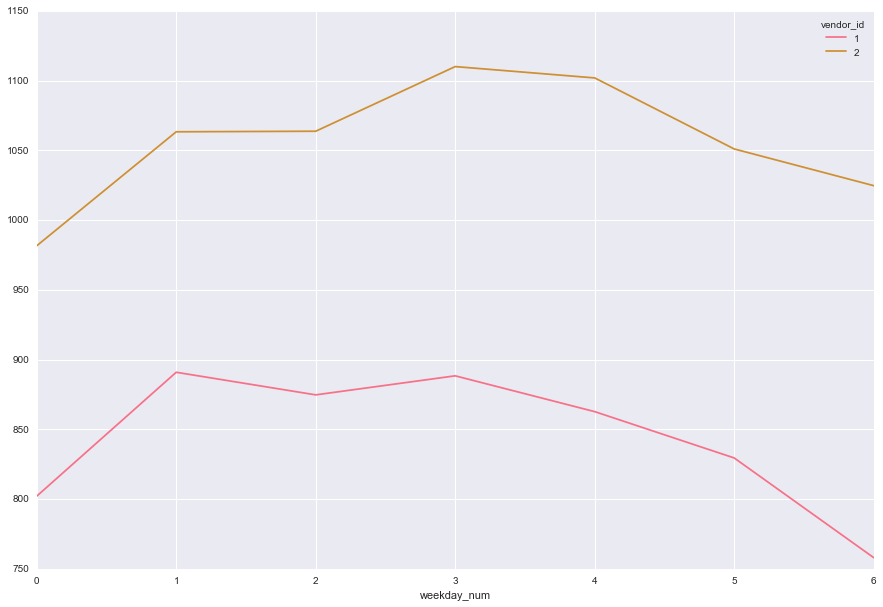

In [6]:
fig, ax = plt.subplots( figsize=(15,10))


data.groupby(['weekday_num','vendor_id']).mean()['trip_duration'].unstack().plot(ax=ax)
plt.show()

#### Findings
##### There's a dip on average trip duration for both Saturday and Sunday
##### Time taken by on the weekdays are generally higher

<br>

In [120]:
data.groupby(['weekday_num','passenger_count']).mean()['trip_duration'].unstack().fillna(0)

passenger_count,0,1,2,3,4,5,6,7,8,9
weekday_num,,,,,,,,,,
0,9182.300000,863.698380,953.400224,973.611157,1054.050268,996.063816,1081.801196,0.0,0.0,0.0
1,11.333333,961.444362,1039.866133,1031.356306,1003.453055,1014.640884,1130.435548,19.0,0.0,0.0
2,792.000000,949.111187,1035.680560,1046.804216,1164.388810,1054.591955,1012.576649,0.0,0.0,0.0
3,23.625000,976.737831,1041.660449,1181.178886,1107.150870,1139.516764,1057.678861,0.0,0.0,0.0
4,489.400000,950.589565,1051.855684,1054.277050,1172.596800,1145.237438,1138.372758,0.0,104.0,560.0
5,221.083333,915.202848,994.873780,1012.747727,952.291075,1098.887720,1026.321258,25.0,0.0,0.0
6,26.538462,879.539862,924.841104,915.167299,968.977273,1018.532753,978.564511,15.0,0.0,0.0


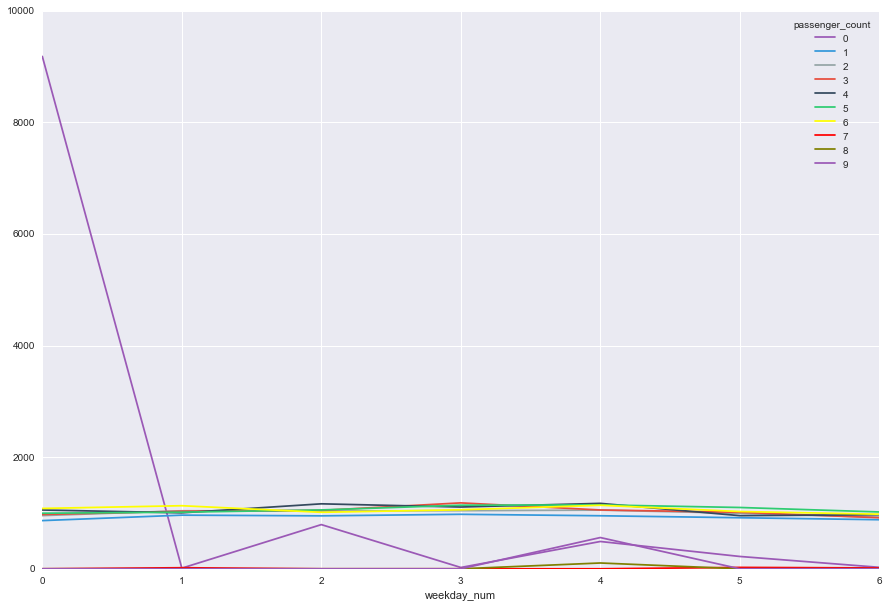

In [129]:
fig, ax = plt.subplots( figsize=(15,10))


data.groupby(['weekday_num','passenger_count']).mean()['trip_duration'].unstack().fillna(0).plot(ax=ax)


    
plt.show()

## Will snow fall volume affect trip duration?

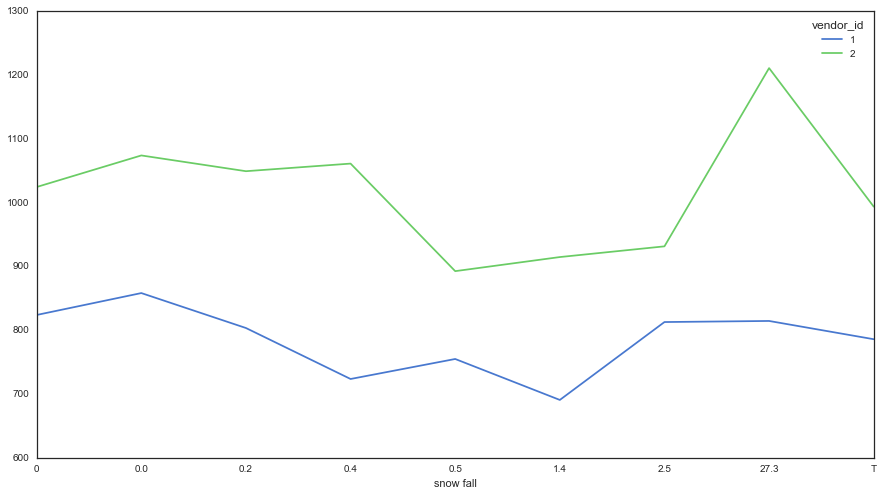

In [120]:
fig, ax = plt.subplots( figsize=(15,8))
train.groupby([ 'snow fall','vendor_id']).mean()['trip_duration'].unstack().fillna(0).plot(ax=ax)


plt.show()

# External Data
<br>

### US holidays are taken into account for training

In [16]:
import holidays
from datetime import date



def US_holiday(dates):
    
    hol = (dates) in holidays.US(state='NY', years=2016)

    
    return hol


data['holiday'] = data['pick_date'].apply(lambda x: US_holiday((x)))

data['holiday'] = data['holiday'].astype('category')
data['holiday'] = data['holiday'].cat.codes

#### Weather data collected from the National Weather Service.
#### It contains the first six months of 2016, for a weather station in central park.
#### It contains for each day the minimum temperature, maximum temperature, average temperature, precipitation, new snow fall, and current snow depth. 
#### The temperature is measured in Fahrenheit and the depth is measured in inches. T means that there is a trace of precipitation.

In [17]:
import pandas as pd

weather_file = "D:\\nyc taxi\\weather_data.csv"

weather_data = pd.read_csv(weather_file, delimiter=',')




In [18]:
data.rename(columns={'pick_date':'date'}, inplace=True)

data.date = pd.to_datetime(data.date)
weather_data.date = pd.to_datetime(weather_data.date)


data.date = data.date.dt.strftime('%Y-%m-%d')
weather_data.date = weather_data.date.dt.strftime('%Y-%m-%d')

train = pd.merge(data, weather_data,how = 'left', on = 'date')


In [19]:


train['snow fall'] = train['snow fall'].replace('T' , 0.1)
train['snow fall'] = train['snow fall'].astype(float)

train['precipitation'] = train['precipitation'].replace('T' , 0.1)
train['precipitation'] = train['precipitation'].astype(float)

train['snow depth'] = train['snow depth'].replace('T' , 0.1)
train['snow depth'] = train['snow depth'].astype(float)


train['pickup_month'] = train['pickup_month'].astype('category')
train['pickup_month'] = train['pickup_month'].cat.codes

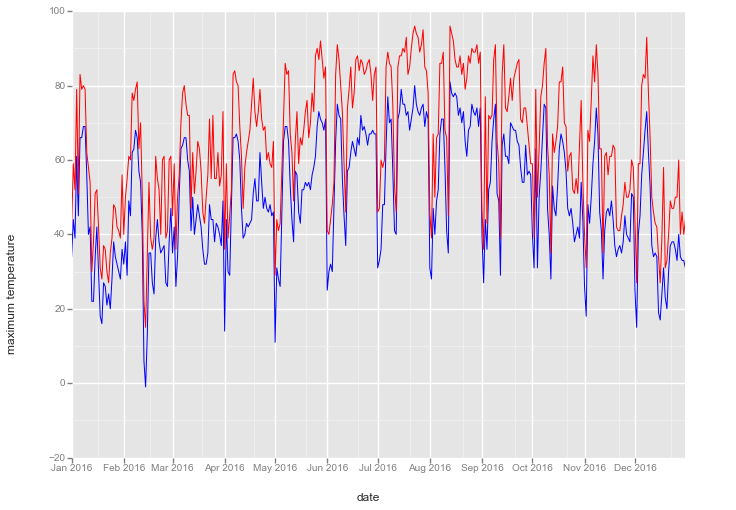

<ggplot: (8080777)>

In [33]:
from ggplot import *
weather_data.date = pd.to_datetime(weather_data.date)
weather_data['day_of_year']= weather_data.date.dt.dayofyear
p = ggplot(aes(x='date'),data=weather_data) + geom_line(aes(y='minimum temperature', colour = "blue")) + geom_line(aes(y='maximum temperature', colour = "red"))
p 

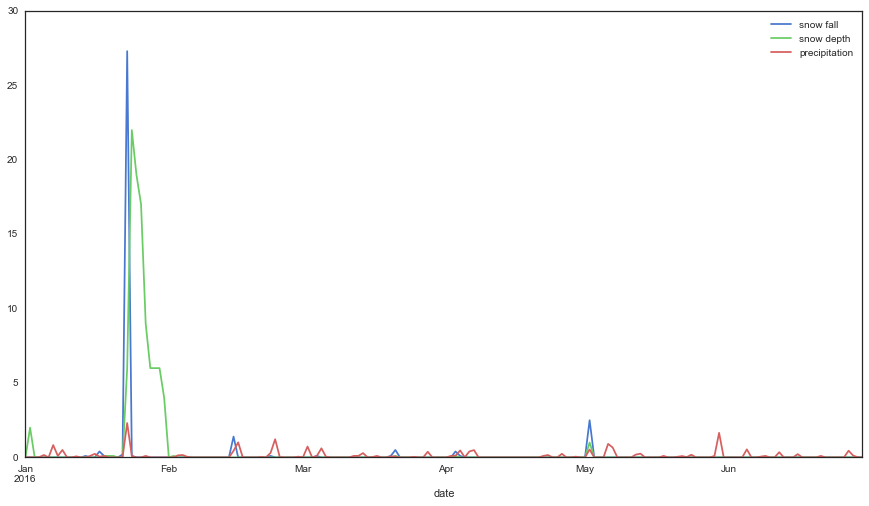

In [94]:

fig, ax = plt.subplots( figsize=(15,8))
train.groupby([ 'date']).mean()[['snow fall' , 'snow depth' , 'precipitation']].plot(ax=ax)


plt.show()


In [20]:

train['avg_trip'] = train['trip_duration'].groupby(train['date']).transform('mean')
train['freq_trip'] = train['trip_duration'].groupby(train['date']).transform('count')

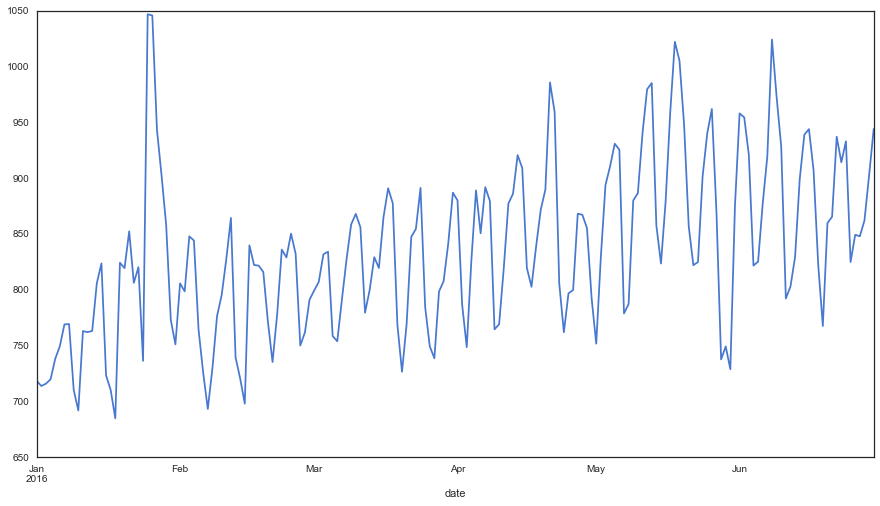

In [85]:

fig, ax = plt.subplots( figsize=(15,8))
train.groupby([ 'date']).mean()['avg_trip'].plot(ax=ax)


plt.show()



#### The average trip duration does shows some clear trail that as the snow fall increases in February, the average time taken per trip increases as well 
<br>

## OSRM Data
### This dataset is generated from Open Source Routing Machine. This is similar to Gmaps but this is open source, so a user can make any number of queries using this engine ( Unlike Gmaps, where per day limit of free requests is 2000. 

In [21]:
fr1 = pd.read_csv('D:\\nyc taxi\\fastest_routes_train_part_1.csv',
                  usecols=['id', 'total_distance', 'total_travel_time',  'number_of_steps'])
fr2 = pd.read_csv('D:\\nyc taxi\\fastest_routes_train_part_2.csv',
                  usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
test_street_info = pd.read_csv('D:\\nyc taxi\\fastest_routes_test.csv',
                               usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])

train_street_info = pd.concat((fr1, fr2))

train = train.merge(train_street_info, how='left', on='id')

In [67]:
train_street_info.describe()

,total_distance,total_travel_time,number_of_steps
count,1.458643e+06,1.458643e+06,1.458643e+06
mean,4.626383e+03,3.893719e+02,7.547126e+00
std,5.303878e+03,3.144679e+02,4.432504e+00
min,0.000000e+00,0.000000e+00,2.000000e+00
25%,1.666100e+03,1.815000e+02,5.000000e+00
50%,2.755100e+03,2.895000e+02,6.000000e+00
75%,5.113800e+03,4.907000e+02,9.000000e+00
max,9.420420e+04,5.135400e+03,4.600000e+01


# Data Cleaning 
<br>

## Hypothesis : Most rides are within the Manhattan city 
<br>

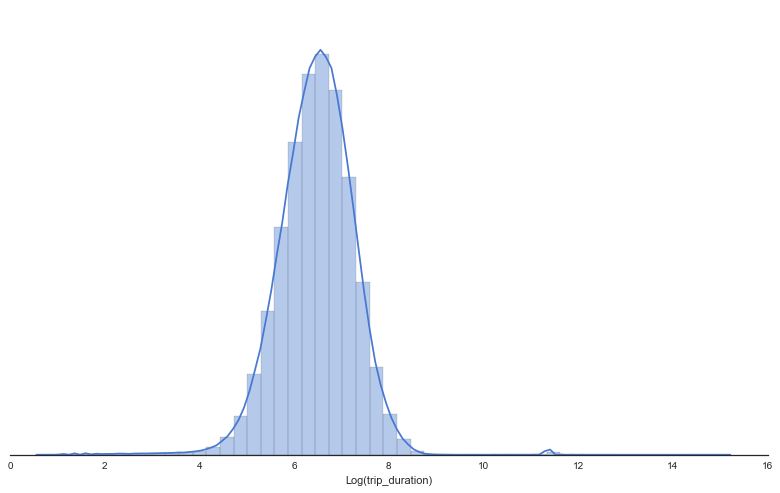

In [38]:
import numpy as np
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
#data are normally distributed hence the data is not imbalance or skew

##### The trip_duration distribution of the training set shows clearly Gaussian distribution. However, in the dataset there are outliers that show long hour trip_duration that is as long as 1000 hours. Hence, these outliers will be removed and will not be taken into account for this situation. 


In [22]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train.loc[:, 'pickup_hour'] = train['pickup_datetime'].dt.hour
train['trip_dur_hr']=train['total_travel_time']/3600


#train=train.loc[train['trip_dur_hr']<=2,[str(i) for i in train.columns]]



##### Below shows that the data set after trimming shows a fairly normal distribution.

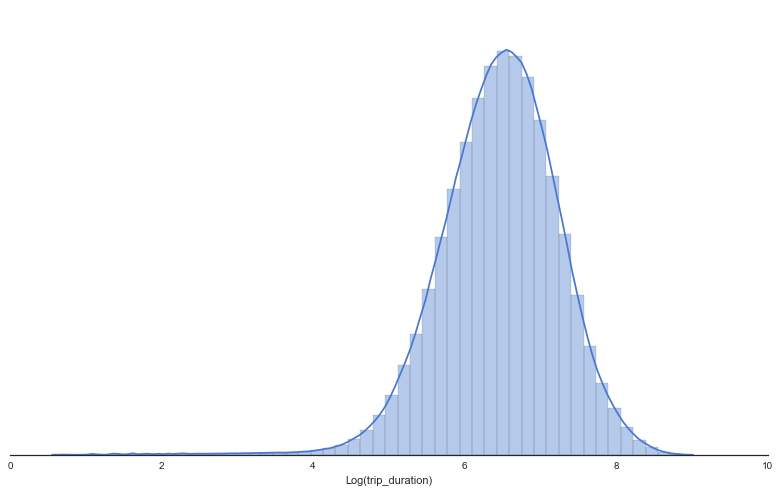

In [115]:
import numpy as np
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
#data are normally distributed hence the data is not imbalance or skew

# Features Engineering

<br>

### Speed , Distance , Direction

In [23]:
import numpy as np 

def haversine_(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)


def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    """function to calculate manhatten distance between pick_drop"""
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    """ function was taken from beluga's notebook as this function works on array
    while my function used to work on individual elements and was noticably slow"""
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, 
                                          train['pickup_longitude'].values, 
                                          train['dropoff_latitude'].values,
                                          train['dropoff_longitude'].values)


train.loc[:,'hrvsn_distance'] = haversine_(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)


train.loc[:,'manhtn_distance'] = manhattan_distance_pd(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)



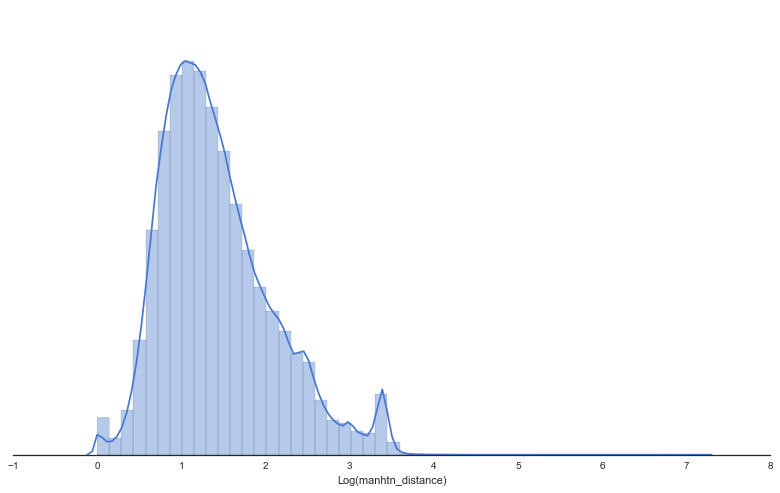

In [116]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train['manhtn_distance'].values+1), axlabel = 'Log(manhtn_distance)', label = 'log(manhtn_distance)', bins = 50)
plt.setp(axes, yticks=[])
plt.tight_layout()

#data are normally distributed hence the data is not imbalance or skew

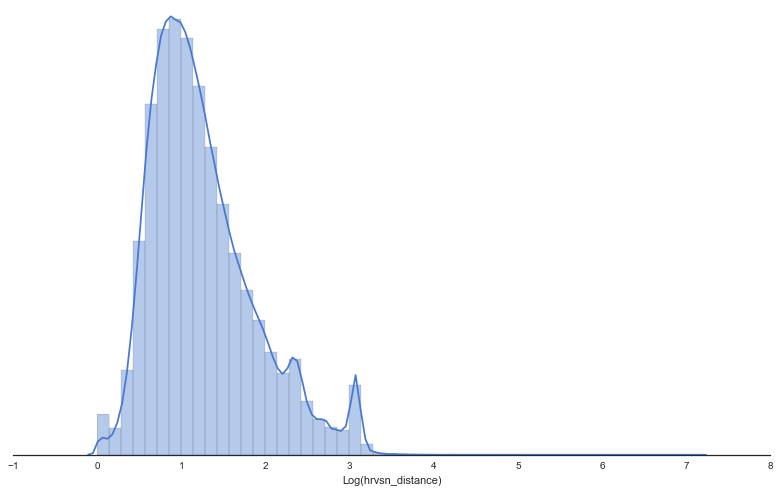

In [117]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train['hrvsn_distance'].values+1), axlabel = 'Log(hrvsn_distance)', label = 'log(hrvsn_distance)', bins = 50)
plt.setp(axes, yticks=[])
plt.tight_layout()

#data are normally distributed hence the data is not imbalance or skew

In [24]:
train['speed_hvsn'] = train.hrvsn_distance/train.total_travel_time
train['speed_manhtn'] = train.manhtn_distance/train.total_travel_time

def speed_kmh(kms):
    
    kmh = kms* 3599.99999971
    return (kmh)


train['speed_kmh'] = speed_kmh(train['speed_hvsn'])

train[['speed_manhtn','speed_hvsn', 'hrvsn_distance','speed_kmh','trip_duration']].max()

speed_manhtn               inf
speed_hvsn                 inf
hrvsn_distance    1.240909e+03
speed_kmh                  inf
trip_duration     3.526282e+06
dtype: float64

In [57]:
train.isnull().sum()

id                        0
vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
weekday                   0
pickup_month              0
date                      0
weekday_num               0
holiday                   0
maximum temperature       0
minimum temperature       0
average temperature       0
precipitation             0
snow fall                 0
snow depth                0
avg_trip                  0
freq_trip                 0
total_distance            1
total_travel_time         1
number_of_steps           1
pickup_hour               0
trip_dur_hr               1
direction                 0
hrvsn_distance            0
manhtn_distance           0
speed_hvsn             5898
speed_manhtn           5898
speed_kmh              5898
dtype: int64

# Data Cleaning #2

### After generating new features, second round of data cleaning is carried out to ensure the quality of the data. By looking at the new features, there are some unreasonable trips that has infinite speed (km/h) and extremely long hours ride. Hence, these kind of data should be removed from the training model. 

In [71]:
train[['pickup_latitude' ,'pickup_longitude' ,'dropoff_latitude' ,'dropoff_longitude' ,'speed_hvsn' , 'trip_duration' ,'total_travel_time']][train['speed_hvsn'].isnull()].head(10)

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,speed_hvsn,trip_duration,total_travel_time
246,40.768963,-73.981819,40.768963,-73.981819,NaN,227,0.0
291,40.775661,-73.959068,40.775661,-73.959068,NaN,1109,0.0
407,40.687336,-73.808487,40.687336,-73.808487,NaN,947,0.0
702,40.647041,-73.786720,40.647041,-73.786720,NaN,580,0.0
1620,40.816853,-74.209854,40.816853,-74.209854,NaN,27,0.0
1728,40.645454,-73.776314,40.645454,-73.776314,NaN,19,0.0
1769,40.821003,-73.954666,40.821003,-73.954666,NaN,254,0.0
2087,40.777180,-73.954628,40.777180,-73.954628,NaN,248,0.0
2441,40.644699,-73.781830,40.644699,-73.781830,NaN,8,0.0
2609,40.773682,-73.875313,40.773682,-73.875313,NaN,1212,0.0


In [73]:
train_cleaned = train.dropna(how = 'any')

len(train) , len(train_cleaned)

(1458644, 1452746)

#### So there are data that has NAN speed because both the pick up lat lon and drop off lat lon are the same, after inspecting, it's impossible to have trip duration yet no distance travel. 

In [65]:
train[['pickup_latitude' ,'pickup_longitude' ,'dropoff_latitude' ,'dropoff_longitude' ,'speed_hvsn' , 'trip_duration' ,'total_travel_time']][train['speed_hvsn'].isin([np.inf])].head(10)

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,speed_hvsn,trip_duration,total_travel_time
2731,40.766262,-73.834335,40.766094,-73.834229,inf,403,0.0
2784,40.646637,-73.790184,40.646641,-73.790184,inf,6,0.0
3480,40.739525,-73.987228,40.739529,-73.987228,inf,10,0.0
3583,40.753269,-73.988922,40.753277,-73.988937,inf,87,0.0
6753,40.766331,-73.977966,40.766369,-73.977951,inf,32,0.0
9955,40.763599,-73.982399,40.763599,-73.982391,inf,7,0.0
10118,40.653481,-73.912956,40.653481,-73.912964,inf,8,0.0
13006,40.781223,-73.558289,40.781227,-73.558281,inf,37,0.0
15013,40.764278,-73.988449,40.764275,-73.988449,inf,28,0.0
20054,40.813709,-73.959908,40.813705,-73.959908,inf,35,0.0


In [127]:

train_cleaned = train_cleaned[~train_cleaned.isin([ np.inf, -np.inf]).any(1)]

len(train) , len(train_cleaned)

(1456391, 1455745)

#### Similarly, there are no info given for total_distance attribute, which lead to infinite value to speed_hvsn. 

In [137]:

train_cleaned = train_cleaned.dropna()
train_cleaned.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
weekday                0
pickup_month           0
date                   0
weekday_num            0
holiday                0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
total_distance         0
total_travel_time      0
number_of_steps        0
trip_dur_hr            0
direction              0
hrvsn_distance         0
manhtn_distance        0
avg_trip               0
freq_trip              0
speed_hvsn             0
speed_manhtn           0
speed_kmh              0
dtype: int64

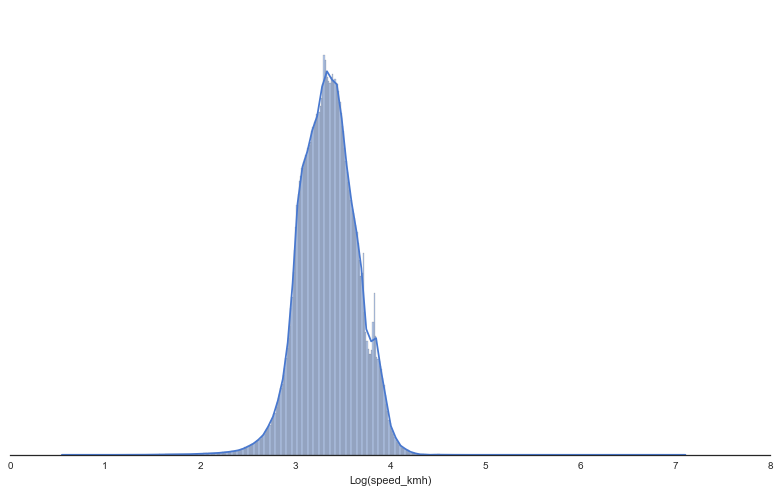

In [232]:

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train_cleaned['speed_kmh'].values+1), axlabel = 'Log(speed_kmh)', label = 'log(speed_kmh)', bins = 500)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
#data are normally distributed hence the data is not imbalance or skew

In [237]:

train_cleaned['store_and_fwd_flag'] = train_cleaned['store_and_fwd_flag'].astype('category')
train_cleaned['store_and_fwd_flag'] = train_cleaned['store_and_fwd_flag'].cat.codes

In [ ]:
do_not_use_for_training = ['id', 'log_trip_duration', 'pickup_datetime', 'dropoff_datetime',
                           'trip_duration',  'pickup_date']
feature_names = [f for f in train.columns if f not in do_not_use_for_training]


In [236]:

train_cleaned[['speed_manhtn','speed_hvsn', 'hrvsn_distance','speed_kmh','trip_duration']].describe()

,speed_manhtn,speed_hvsn,hrvsn_distance,speed_kmh,trip_duration
count,1.443077e+06,1.443077e+06,1.443077e+06,1.443077e+06,1.443077e+06
mean,1.028227e-02,7.962832e-03,3.465491e+00,2.866619e+01,8.401696e+02
std,3.456317e-03,2.459209e-03,3.947127e+00,8.853153e+00,6.533621e+02
min,2.712968e-04,2.285991e-04,1.000080e-01,8.229569e-01,1.000000e+00
25%,7.826411e-03,6.171617e-03,1.251519e+00,2.221782e+01,4.000000e+02
50%,9.726595e-03,7.600221e-03,2.113369e+00,2.736079e+01,6.650000e+02
75%,1.217490e-02,9.323501e-03,3.902236e+00,3.356460e+01,1.076000e+03
max,5.150950e-02,3.648837e-02,1.164964e+02,1.313581e+02,7.191000e+03


In [240]:
import os
outfile = os.path.abspath("D:\\nyc taxi\\train_processed_cleaned.csv")

train_cleaned.to_csv(outfile, fmt = '%d')



#
#
#

# Test set

#
#
#

In [75]:

input_test = "D:\\nyc taxi\\test.csv"

test = pd.read_csv(input_test, delimiter=',')


In [210]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [48]:
import calendar
import pandas as pd
import numpy as np

import holidays

def haversine_(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)


def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    """function to calculate manhatten distance between pick_drop"""
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b


def US_holiday(dates):
    
    hol = (dates) in holidays.US(state='NY', years=2016)
    
    return hol


test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

test['weekday'] = test['pickup_datetime'].dt.weekday_name

test['pickup_hour'] = test.pickup_datetime.apply(lambda x: x.hour)

test['weekday_num'] = test['pickup_datetime'].dt.weekday

test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

test.loc[:, 'pick_date'] = test['pickup_datetime'].dt.date

test['pickup_month'] = test.pickup_datetime.apply(lambda x: x.month)

test['pickup_month'] = test.pickup_month.apply(lambda x: calendar.month_abbr[x])


#for date, name in sorted(holidays.US(state='NY', years=2016).items()):
    #print(date, name)



test['holiday'] = test['pick_date'].apply(lambda x: US_holiday((x)))


test.loc[:,'hrvsn_distance'] = haversine_(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)


test.loc[:,'manhtn_distance'] = manhattan_distance_pd(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)




In [52]:
def bearing_array(lat1, lng1, lat2, lng2):
    """ function was taken from beluga's notebook as this function works on array
    while my function used to work on individual elements and was noticably slow"""
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
    
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, 
                                         test['pickup_longitude'].values, 
                                         test['dropoff_latitude'].values, 
                                         test['dropoff_longitude'].values)

In [53]:
#OSRM external data

test_street_info = pd.read_csv('D:\\nyc taxi\\fastest_routes_test.csv',
                               usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])


test = test.merge(test_street_info, how='left', on='id')

In [55]:
test['speed_hvsn'] = test.hrvsn_distance/test.total_travel_time
test['speed_manhtn'] = test.manhtn_distance/test.total_travel_time
test['trip_dur_hr']=test['total_travel_time']/3600

In [56]:

weather_file = "D:\\nyc taxi\\weather_data.csv"

weather_data = pd.read_csv(weather_file, delimiter=',')

test.rename(columns={'pick_date':'date'}, inplace=True)

test.date = pd.to_datetime(test.date)
weather_data.date = pd.to_datetime(weather_data.date)


test.date = test.date.dt.strftime('%Y-%m-%d')
weather_data.date = weather_data.date.dt.strftime('%Y-%m-%d')


test_data = pd.merge(test, weather_data,how = 'left', on = 'date')

In [57]:
test_data['snow depth'] = test_data['snow depth'].replace('T' , 0.1)

test_data['snow fall'] = test_data['snow fall'].replace('T' , 0.1)

test_data['precipitation'] = test_data['precipitation'].replace('T' , 0.1)

test_data['snow fall'] = test_data['snow fall'].astype(float)

test_data.date = pd.to_datetime(test_data.date)

test_data['avg_trip'] = test_data['hrvsn_distance'].groupby(test_data['date']).transform('mean')
test_data['freq_trip'] = test_data['hrvsn_distance'].groupby(test_data['date']).transform('count')

test_data['holiday'] = test_data['holiday'].astype('category')
test_data['holiday'] = test_data['holiday'].cat.codes

In [58]:

test_data['pickup_month'] = test_data['pickup_month'].astype('category')
test_data['pickup_month'] = test_data['pickup_month'].cat.codes

In [59]:
test_data['speed_hvsn'] = test_data.hrvsn_distance/train.total_travel_time
test_data['speed_manhtn'] = test_data.manhtn_distance/train.total_travel_time

def speed_kmh(kms):
    
    kmh = kms* 3599.99999971
    return (kmh)


test_data['speed_kmh'] = speed_kmh(test_data['speed_hvsn'])

test_data[['speed_manhtn','speed_hvsn', 'hrvsn_distance','speed_kmh']].max()

speed_manhtn          8.023856
speed_hvsn            5.614589
hrvsn_distance     1036.043469
speed_kmh         20212.521929
dtype: float64

In [60]:
#test_data = test_data[~test_data.isin([ np.nan]).any(1)]
#test_data = test_data[~test_data.isin([ np.inf, -np.inf]).any(1)]
#test_cleaned = test_data.dropna()
len(test_data)

625134

In [62]:
#test_cleaned = test_cleaned.loc[(test_cleaned['speed_kmh' ] <= 160) ]

#test_cleaned = test_cleaned.loc[(test_cleaned['hrvsn_distance' ] > 0.1) ]
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].astype('category')
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].cat.codes

In [63]:
test_data[['speed_manhtn','speed_hvsn', 'hrvsn_distance','speed_kmh']].max()

speed_manhtn          8.023856
speed_hvsn            5.614589
hrvsn_distance     1036.043469
speed_kmh         20212.521929
dtype: float64

In [64]:
test_data.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
weekday                0
pickup_hour            0
weekday_num            0
date                   0
pickup_month           0
holiday                0
hrvsn_distance         0
manhtn_distance        0
direction              0
total_distance         0
total_travel_time      0
number_of_steps        0
speed_hvsn             0
speed_manhtn           0
trip_dur_hr            0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
avg_trip               0
freq_trip              0
speed_kmh              0
dtype: int64

In [ ]:
#test_data.loc[(test_data['speed_kmh' ] >= 160) ]

#test_data.loc[(test_data['hrvsn_distance' ] < 0.1) ]

In [66]:

outfile = os.path.abspath("D:\\nyc taxi\\test_processed_cleaned_v2.csv")

test_data.to_csv(outfile, fmt = '%d')

# MODEL
<br>

In [ ]:
import pandas as pd 
import numpy as np 

input_train = "D:\\nyc taxi\\train_processed_cleaned.csv"

train = pd.read_csv(input_train, delimiter=',')




In [19]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train.loc[:, 'pickup_hour'] = train['pickup_datetime'].dt.hour

do_not_use_for_training = ['id', 'log_trip_duration', 'pickup_datetime', 'dropoff_datetime',
                           'trip_duration',  'pickup_date', 'date', 'weekday']

train.columns

Index([u'Unnamed: 0', u'id', u'vendor_id', u'pickup_datetime',
       u'dropoff_datetime', u'passenger_count', u'pickup_longitude',
       u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
       u'store_and_fwd_flag', u'trip_duration', u'weekday', u'pickup_month',
       u'date', u'weekday_num', u'holiday', u'maximum temperature',
       u'minimum temperature', u'average temperature', u'precipitation',
       u'snow fall', u'snow depth', u'total_distance', u'total_travel_time',
       u'number_of_steps', u'trip_dur_hr', u'direction', u'hrvsn_distance',
       u'manhtn_distance', u'avg_trip', u'freq_trip', u'speed_hvsn',
       u'speed_manhtn', u'speed_kmh', u'pickup_hour'],
      dtype='object')

In [20]:
train = train.iloc[:,1:]

feature_names = [f for f in train.columns if f not in do_not_use_for_training]


train_y = np.log(train['trip_duration'].values + 1)

train_X = train[feature_names]
print('We have %i features.' % len(train_X.columns.values))
train_X.columns.values

We have 29 features.


array(['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_month', 'weekday_num', 'holiday',
       'maximum temperature', 'minimum temperature', 'average temperature',
       'precipitation', 'snow fall', 'snow depth', 'total_distance',
       'total_travel_time', 'number_of_steps', 'trip_dur_hr', 'direction',
       'hrvsn_distance', 'manhtn_distance', 'avg_trip', 'freq_trip',
       'speed_hvsn', 'speed_manhtn', 'speed_kmh', 'pickup_hour'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [3]:
from sklearn import ensemble


best_params = {'n_estimators': 400, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 5 ,'learning_rate': 0.01}
    
clf = ensemble.GradientBoostingRegressor(**best_params)

clf.fit(X_train ,y_train)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=5, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

### Experiment 1

In [34]:
#scorer(clf, X_train,y_train)
y_valid_predict = clf.predict(X_validation)

In [35]:
clf.score(X_train,y_train)

0.80237856451010847

In [36]:
from sklearn import metrics
metrics.r2_score(y_validation, y_valid_predict)

0.8015246023256366

In [8]:
from sklearn import metrics
metrics.r2_score(y_validation, y_valid_predict)

0.79053280121040026

In [37]:
metrics.mean_squared_error(y_validation, y_valid_predict)

0.10749427751932764

## Save Model

In [4]:
#Save model

import pickle
import os 
modelfile = os.path.abspath("D:\\nyc taxi\\finalized_model_v2.sav")
pickle.dump(clf, open(modelfile, 'wb'))


In [47]:
import pickle
loaded_model = pickle.load(open("D:\\nyc taxi\\finalized_model_v2.sav", 'rb'))



## Run on Test Set
<br>

In [3]:
import pandas as pd
input_test = "D:\\nyc taxi\\test_processed_cleaned_v2.csv"

test = pd.read_csv(input_test, delimiter=',')


In [5]:
test = test.iloc[:,1:]
test.columns.values


array(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'weekday', 'pickup_hour',
       'weekday_num', 'date', 'pickup_month', 'holiday', 'hrvsn_distance',
       'manhtn_distance', 'direction', 'total_distance',
       'total_travel_time', 'number_of_steps', 'speed_hvsn',
       'speed_manhtn', 'trip_dur_hr', 'maximum temperature',
       'minimum temperature', 'average temperature', 'precipitation',
       'snow fall', 'snow depth', 'avg_trip', 'freq_trip', 'speed_kmh'], dtype=object)

In [8]:


do_not_use_for_training = ['id',  'pickup_datetime', 'dropoff_datetime',
                           'pickup_date', 'date', 'weekday']
feature_names = [f for f in test.columns if f not in do_not_use_for_training]

test_X = test[feature_names]
#test[feature_names].count()

In [9]:

print('We have %i features.' % len(test_X.columns.values))
test_X.columns.values


We have 29 features.


array(['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_hour', 'weekday_num', 'pickup_month',
       'holiday', 'hrvsn_distance', 'manhtn_distance', 'direction',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'speed_hvsn', 'speed_manhtn', 'trip_dur_hr', 'maximum temperature',
       'minimum temperature', 'average temperature', 'precipitation',
       'snow fall', 'snow depth', 'avg_trip', 'freq_trip', 'speed_kmh'], dtype=object)

In [11]:
y_test_predict = loaded_model.predict(test_X)

In [85]:

inverse_trip_duration= (np.exp(y_test_predict) )+1 

In [86]:
inverse_trip_duration_result = pd.concat((test['id'], pd.DataFrame(inverse_trip_duration) ), axis = 1)

In [87]:

outfile = os.path.abspath("D:\\nyc taxi\\test_result_inverse_trip_duration.csv")

inverse_trip_duration_result.to_csv(outfile, fmt = '%d',index=False)

# Important variables that influence the duration of the trip 

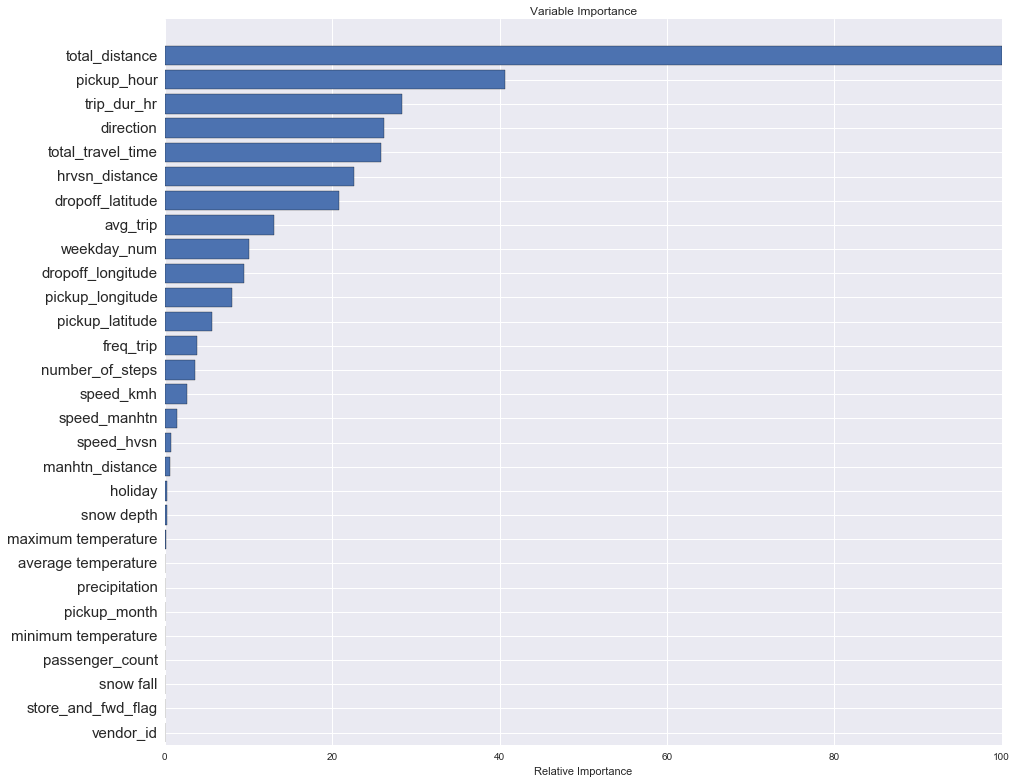

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline  

feature_importance = loaded_model.feature_importances_
# make importances relative to max importance
f, ax = plt.subplots(figsize=(15, 13))

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx], fontsize=15)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()